In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pokemon.csv')

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<Axes: ylabel='count'>

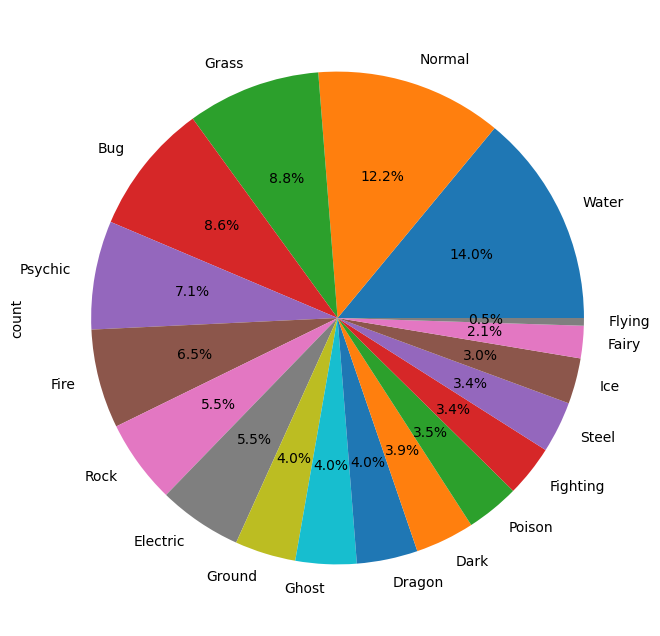

In [15]:
df['Type 1'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize=(10,8))

<Axes: ylabel='Frequency'>

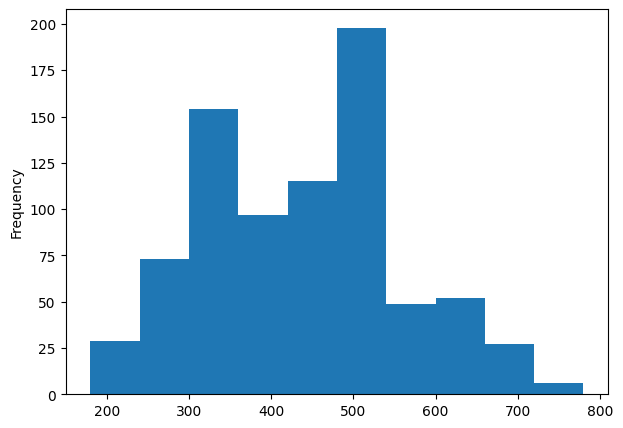

In [16]:
df['Total'].plot(kind='hist', figsize=(7,5))

<Axes: >

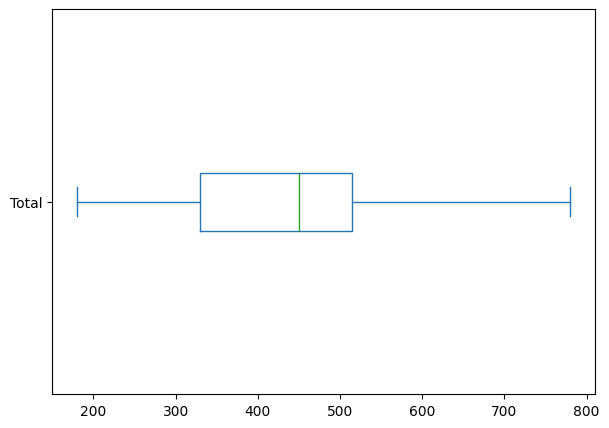

In [18]:
df['Total'].plot(kind='box', figsize=(7,5), vert = False)

<Axes: ylabel='count'>

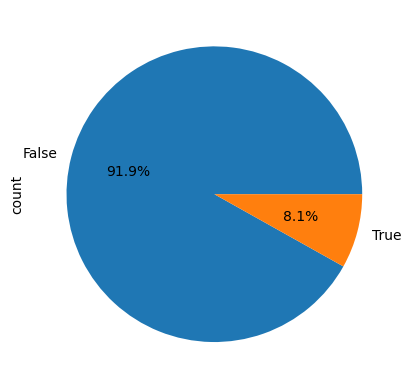

In [20]:
df['Legendary'].value_counts().plot(kind='pie', autopct = '%1.1f%%')

### How many pokemon exist with an Attack value greater than 150?

<Axes: xlabel='Attack'>

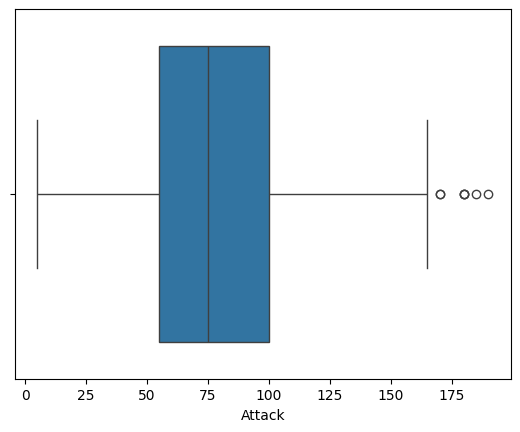

In [21]:
sns.boxplot(data=df, x = 'Attack')

In [27]:
df[df['Attack'] > 150].shape[0]

18

In [29]:
df.query("Attack > 150").shape[0]

18

### How many pokemons are of type 1 'Fire' and Type 2 'Flying'

In [41]:
df[(df['Type 1'] == 'Fire') & (df['Type 2'] == 'Flying')].shape[0]

6

In [44]:
df.query("`Type 1` == 'Fire' and `Type 2` == 'Flying'")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


### What pokemon with type 1 'Ice' has the strongest defense

In [53]:
max_def = df.loc[df['Type 1'] == 'Ice', 'Defense'].max()

df[(df['Type 1'] == 'Ice') & (df['Defense'] == max_def)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [63]:
df[df['Type 1'] == 'Ice'].sort_values(by='Defense', ascending= False).iloc[0]['Name']

'Avalugg'

### Whats the most common for type 1 for legendary Pokemmon?

In [66]:
df.loc[df['Legendary'], 'Type 1'].value_counts()

Type 1
Psychic     14
Dragon      12
Fire         5
Rock         4
Water        4
Steel        4
Electric     4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: count, dtype: int64

### Whats the most powerful pokemon by Total from the first 3 generation that is of type water?

In [68]:
df[(df['Type 1'] == 'Water') & ((df['Generation'] == 1) | (df['Generation'] == 2) | (df['Generation'] == 3))].sort_values(by='Total', ascending= False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False


In [69]:
# or

df[(df['Type 1'] == 'Water') & df['Generation'].isin([1,2,3])].sort_values(by='Total', ascending= False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False


### Whats the most powerful pokemon that is a Type Dragon (either Type 1 or Type 2) fromm the last two generation

In [71]:
df['Generation'].value_counts(sort=False)

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

In [72]:
df[((df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon')) & (df['Generation'].isin([5,6]))].sort_values(by='Total', ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True


### Select the Legendary pokemon that are Type 1 'Fire' but select only Name, Attack, Generation column

df.loc[ (Conditions fot INDEX) , (columns) ]

In [74]:
df.loc[(df['Type 1'] == 'Fire') & (df['Generation']), ['Name', 'Attack', 'Generation']]

,Name,Attack,Generation
4,Charmander,52,1
5,Charmeleon,64,1
6,Charizard,84,1
7,CharizardMega Charizard X,130,1
8,CharizardMega Charizard Y,104,1
42,Vulpix,41,1
43,Ninetales,76,1
63,Growlithe,70,1
64,Arcanine,110,1
83,Ponyta,85,1
